In [1]:
library(hdm)
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



Here we load the hdm package that contains the example Barro and Lee dataset, and the glmnet package that will provide the functions for estimating LASSO and elastic net regressions.

In [2]:
data(GrowthData)  ## the Barro and Lee data
dim(GrowthData)[1]  ## number of rows
dim(GrowthData)[2]  ## number of columns

[1] 90

[1] 63

We have 90 complete observations of data.

In [3]:
head(GrowthData)

Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,⋯,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
-0.02433575,1,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,⋯,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
0.10047257,1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,⋯,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
0.06705148,1,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,⋯,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
0.06408917,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,⋯,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,⋯,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
0.04640744,1,7.218910,0.0000,0.258865,0.020880,0.023,0.038,0.006,0.50,⋯,1.46,0.160,0.174,0.146,34.3,8.1,0.0634,0.0762,1.000,-0.001747


The first column contains the growth rates, the second column is an intercept, and the other columns contain country-level covariates potentially related to growth.  So all in all we have 61 covariates.

In [4]:
fit <- glmnet(as.matrix(GrowthData[,-c(1,2)]),
              GrowthData$Outcome,
              alpha=1,
              standardize=TRUE)

This is the function that fits the LASSO.  The first argument is the $X$ matrix of covariates, which are all but the first and second columns of GrowthData.  The second argument is the $y$ vector of values for the dependent variable.  The third argument specifies the LASSO penalty (an $\alpha \in (0,1)$ is an elastic net regression, and $\alpha=0$ is a ridge regression), and is actually also the default so could have been omitted.  The fourth argument is also the default, but introduced for pedagogic reasions.  As discussed in class it is important to standardize the variables in a penalized regression so that units of measurement don't affect which variables get penalized.

In [5]:
names(fit)  ## the output associated with the LASSO estimation.

[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

In [6]:
length(fit$lambda)
fit$lambda

[1] 100

[1] 1.871968e-02 1.705667e-02 1.554140e-02 1.416075e-02 1.290275e-02
  [6] 1.175650e-02 1.071209e-02 9.760454e-03 8.893362e-03 8.103301e-03
 [11] 7.383426e-03 6.727502e-03 6.129850e-03 5.585291e-03 5.089109e-03
 [16] 4.637007e-03 4.225068e-03 3.849724e-03 3.507725e-03 3.196109e-03
 [21] 2.912175e-03 2.653466e-03 2.417739e-03 2.202954e-03 2.007249e-03
 [26] 1.828931e-03 1.666454e-03 1.518411e-03 1.383519e-03 1.260611e-03
 [31] 1.148622e-03 1.046582e-03 9.536061e-04 8.688904e-04 7.917005e-04
 [36] 7.213680e-04 6.572837e-04 5.988924e-04 5.456885e-04 4.972110e-04
 [41] 4.530402e-04 4.127933e-04 3.761219e-04 3.427083e-04 3.122630e-04
 [46] 2.845224e-04 2.592462e-04 2.362155e-04 2.152308e-04 1.961103e-04
 [51] 1.786884e-04 1.628142e-04 1.483502e-04 1.351712e-04 1.231630e-04
 [56] 1.122215e-04 1.022521e-04 9.316827e-05 8.489145e-05 7.734993e-05
 [61] 7.047838e-05 6.421727e-05 5.851239e-05 5.331431e-05 4.857801e-05
 [66] 4.426247e-05 4.033032e-05 3.674748e-05 3.348294e-05 3.050841e-05
 [71] 2.779812e-05 2.532861e-05 2.307849e-05 2.102826e-05 1.916017e-05
 [76] 1.745803e-05 1.590711e-05 1.449396e-05 1.320636e-05 1.203314e-05
 [81] 1.096415e-05 9.990128e-06 9.102632e-06 8.293980e-06 7.557165e-06
 [86] 6.885807e-06 6.274091e-06 5.716718e-06 5.208861e-06 4.746120e-06
 [91] 4.324488e-06 3.940312e-06 3.590266e-06 3.271316e-06 2.980702e-06
 [96] 2.715904e-06 2.474631e-06 2.254792e-06 2.054482e-06 1.871968e-06

The call to glmnet estimated 100 different versions of the LASSO, each with a different penalty.

In [7]:
dim(fit$beta)  ## the estimated regression coefficients, rows represent covariates, columns represent different penalties

[1]  61 100

In [8]:
fit$beta[,1]  ## the regression coefficients associated with the most penalized regression

gdpsh465    bmp1l   freeop  freetar      h65     hm65     hf65      p65 
       0        0        0        0        0        0        0        0 
    pm65     pf65      s65     sm65     sf65   fert65   mort65 lifee065 
       0        0        0        0        0        0        0        0 
   gpop1    fert1    mort1  invsh41  geetot1  geerec1     gde1   govwb1 
       0        0        0        0        0        0        0        0 
 govsh41 gvxdxe41   high65  highm65  highf65  highc65 highcm65 highcf65 
       0        0        0        0        0        0        0        0 
 human65 humanm65 humanf65    hyr65   hyrm65   hyrf65     no65    nom65 
       0        0        0        0        0        0        0        0 
   nof65 pinstab1    pop65 worker65  pop1565  pop6565    sec65   secm65 
       0        0        0        0        0        0        0        0 
  secf65   secc65  seccm65  seccf65    syr65   syrm65   syrf65 teapri65 
       0        0        0        0        0        0        0        0 
teasec65      ex1      im1     xr65     tot1 
       0        0        0        0        0

In [9]:
fit$beta[,2]  ## the regression coefficients associated with the second-most penalized regression

gdpsh465        bmp1l       freeop      freetar          h65         hm65 
 0.000000000 -0.006713029  0.000000000  0.000000000  0.000000000  0.000000000 
        hf65          p65         pm65         pf65          s65         sm65 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
        sf65       fert65       mort65     lifee065        gpop1        fert1 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
       mort1      invsh41      geetot1      geerec1         gde1       govwb1 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
     govsh41     gvxdxe41       high65      highm65      highf65      highc65 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
    highcm65     highcf65      human65     humanm65     humanf65        hyr65 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
      hyrm65       hyrf65         no65        nom65        nof65     pinstab1 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
       pop65     worker65      pop1565      pop6565        sec65       secm65 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
      secf65       secc65      seccm65      seccf65        syr65       syrm65 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
      syrf65     teapri65     teasec65          ex1          im1         xr65 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
        tot1 
 0.000000000

In [10]:
fit$beta[,100]  ## the regression coefficients associated with the least penalized regression

gdpsh465         bmp1l        freeop       freetar           h65 
 1.059912e-03 -5.720353e-02  1.124197e-01 -3.329829e-01 -2.138029e+00 
         hm65          hf65           p65          pm65          pf65 
 9.886681e-01  1.211656e+00  3.183414e-01  9.680692e-02 -2.602164e-01 
          s65          sm65          sf65        fert65        mort65 
 1.131162e-01 -9.416611e-02 -1.875904e-01 -1.256125e-02  2.035481e-01 
     lifee065         gpop1         fert1         mort1       invsh41 
-1.761793e-01 -4.648671e-01  1.869737e-02 -9.505063e-01  1.546234e-02 
      geetot1       geerec1          gde1        govwb1       govsh41 
 3.241883e-01  4.085008e-01  5.344544e-01  1.873571e-01 -5.927902e-01 
     gvxdxe41        high65       highm65       highf65       highc65 
 4.331551e-01 -8.606136e-05  6.039997e-03 -1.399825e-02  0.000000e+00 
     highcm65      highcf65       human65      humanm65      humanf65 
 1.382531e-02 -1.884215e-02  1.165502e-03 -1.535926e-02  2.281479e-02 
        hyr65        hyrm65        hyrf65          no65         nom65 
-1.592070e-05  5.888941e-03 -3.560742e-02 -2.433259e-04 -5.346883e-04 
        nof65      pinstab1         pop65      worker65       pop1565 
 2.667922e-04 -2.698711e-02  7.344608e-08  5.849793e-02 -4.095739e-01 
      pop6565         sec65        secm65        secf65        secc65 
-1.588250e+00  1.867083e-06 -4.657404e-03  1.171409e-04  1.410028e-03 
      seccm65       seccf65         syr65        syrm65        syrf65 
 1.503815e-02 -2.166134e-02  4.416279e-03 -3.209445e-02  1.655795e-01 
     teapri65      teasec65           ex1           im1          xr65 
-5.412247e-04 -6.740523e-05 -6.048604e-01  5.607890e-01 -4.833267e-05 
         tot1 
-6.954927e-02

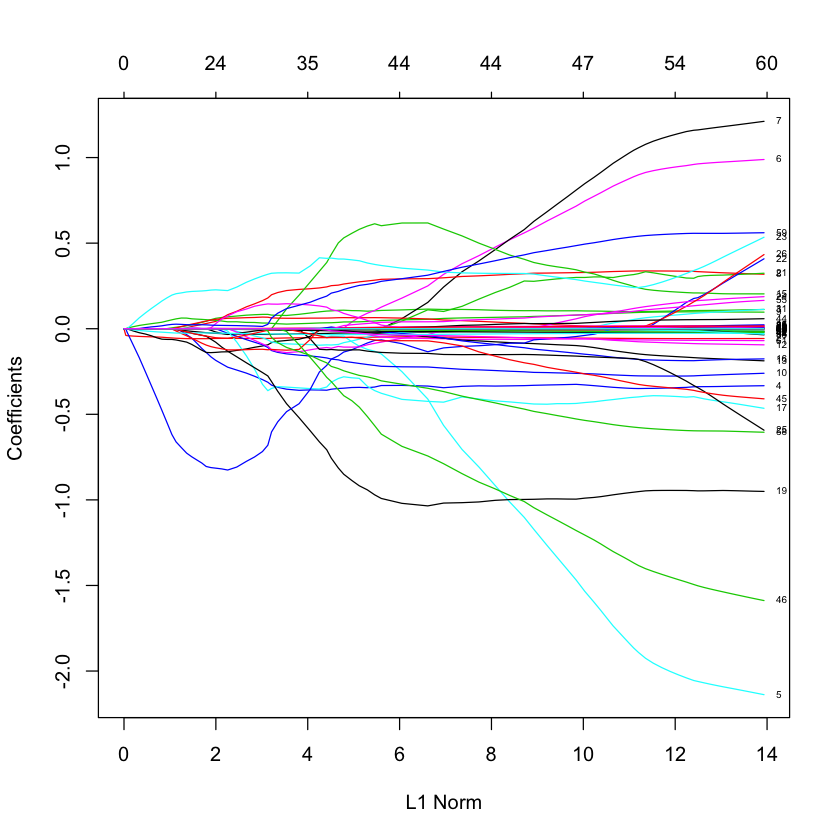

In [11]:
plot(fit, label=TRUE)  ## plot of regression coefficients as a function of the penalty.

In [12]:
cv.fit <- cv.glmnet(as.matrix(GrowthData[,-c(1,2)]),
                    GrowthData$Outcome,
                    nfolds=nrow(GrowthData),
                    standardize=TRUE)

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

This is the call that will estimate LASSO and select a model (i.e. select $\lambda$) based on cross-validation.  Here we perform $N$-fold cross-validation, so that each data point will form a test set.  Below we look at the most penalized model that comes within one standard error of the best-fit model.

In [13]:
sum(coef(cv.fit, s="lambda.1se") !=  0)  ## the number of selected covariates

[1] 46

In [14]:
coef(cv.fit, s="lambda.1se")  ## the coefficients associated with selected model

62 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  6.684906e-01
gdpsh465    -1.127182e-02
bmp1l       -5.180064e-02
freeop       1.061424e-01
freetar     -3.339038e-01
h65         -1.011732e+00
hm65         5.193521e-01
hf65         5.221671e-01
p65          3.176964e-01
pm65         6.831802e-02
pf65        -2.483957e-01
s65          .           
sm65        -6.208348e-02
sf65        -8.111072e-02
fert65      -6.182208e-03
mort65       4.305579e-01
lifee065    -1.022729e-01
gpop1       -4.275569e-01
fert1        5.812291e-03
mort1       -9.982699e-01
invsh41      3.512044e-02
geetot1      2.419025e-01
geerec1     -8.467232e-02
gde1         3.228525e-01
govwb1       .           
govsh41     -1.510898e-01
gvxdxe41     .           
high65       .           
highm65      .           
highf65     -1.885455e-03
highc65      .           
highcm65     1.325728e-02
highcf65    -1.938391e-02
human65      .           
humanm65     .           
humanf65     .        

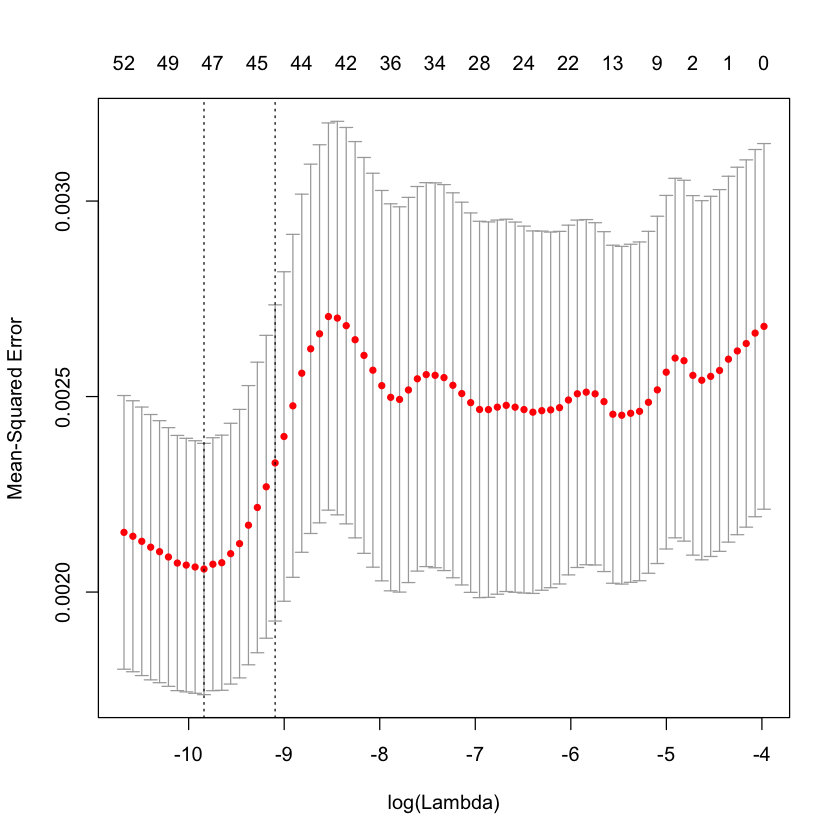

In [15]:
plot(cv.fit)  ## model performance for different values of the penalty